optimal j: 2
mean estimate: 0.0
mean estimate: 0.48148148148148145
mean estimate: 0.7465904532691535
total reward earned: 7458.0
overall win rate: 0.7458
num times selected optimal bandit: 9972


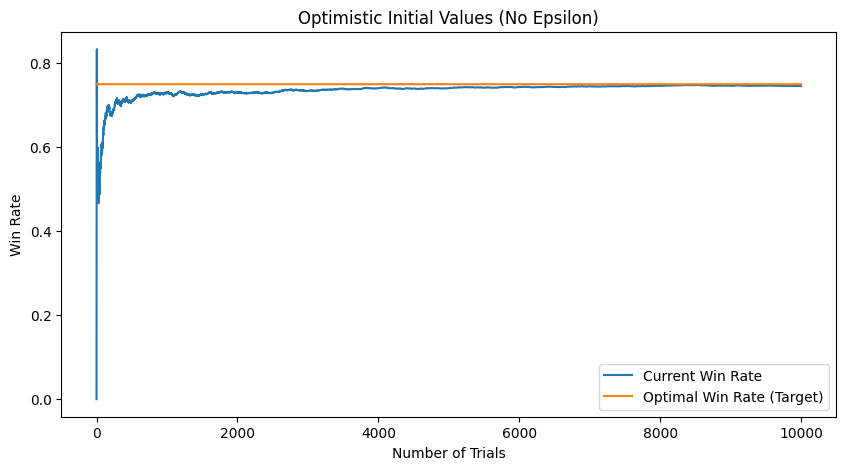

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. CONFIGURATION
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.25, 0.5, 0.75]
INITIAL_ESTIMATE = 5.0  # optimistic initial value


class Bandit:
    def __init__(self, p, initial=0.0):
        self.p = p
        self.p_estimate = initial
        self.N = 0.

    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N


def experiment():
    bandits = [Bandit(p, initial=INITIAL_ESTIMATE) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_optimal = 0

    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)

    # MAIN LOOP: always exploit (argmax)
    for i in range(NUM_TRIALS):
        j = np.argmax([b.p_estimate for b in bandits])  # always exploit

        if j == optimal_j:
            num_optimal += 1

        x = bandits[j].pull()
        rewards[i] = x
        bandits[j].update(x)

    # PRINT FINAL ESTIMATES
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected optimal bandit:", num_optimal)

    # PLOT RESULTS
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(win_rates, label="Current Win Rate")
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES), label="Optimal Win Rate (Target)")
    plt.legend()
    plt.title("Optimistic Initial Values (No Epsilon)")
    plt.xlabel("Number of Trials")
    plt.ylabel("Win Rate")
    plt.show()


if __name__ == "__main__":
    experiment()
